In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(42)
from sklearn.metrics import confusion_matrix
import keras
from keras.utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
glaucoma_data=pd.read_csv('/content/gdrive/MyDrive/glaucomaData/glaucoma/glaucoma2.csv',header=0)
glaucoma_data.head()

Filename  ExpCDR Eye Set  Glaucoma
0         1  0.7097  OD   A         0
1         2  0.6953  OS   A         0
2         3  0.9629  OS   A         0
3         4  0.7246  OD   A         0
4         5  0.6138  OS   A         0

In [ ]:
glaucoma_data.shape

(650, 5)

In [ ]:
le = LabelEncoder()
le.fit(glaucoma_data['Glaucoma'])
LabelEncoder()
print(list(le.classes_))

[0, 1]


In [ ]:
glaucoma_data['label']=le.transform(glaucoma_data['Glaucoma'])
print(glaucoma_data.sample(10))

     Filename  ExpCDR Eye Set  Glaucoma  label
637       638  0.5253  OS   B         1      1
220       221  0.5699  OS   B         0      0
428       429  0.7116  OS   B         1      1
326       327  0.8824  OD   B         1      1
72         73  0.5341  OD   A         0      0
516       517  0.5644  OD   A         0      0
181       182  0.6236  OD   B         1      1
131       132  0.3453  OS   A         0      0
231       232  0.7917  OD   B         0      0
277       278  0.7120  OD   B         1      1


In [ ]:
glaucoma_data.head()

Filename  ExpCDR Eye Set  Glaucoma  label
0         1  0.7097  OD   A         0      0
1         2  0.6953  OS   A         0      0
2         3  0.9629  OS   A         0      0
3         4  0.7246  OD   A         0      0
4         5  0.6138  OS   A         0      0

In [ ]:
glaucoma_data.shape

(650, 6)

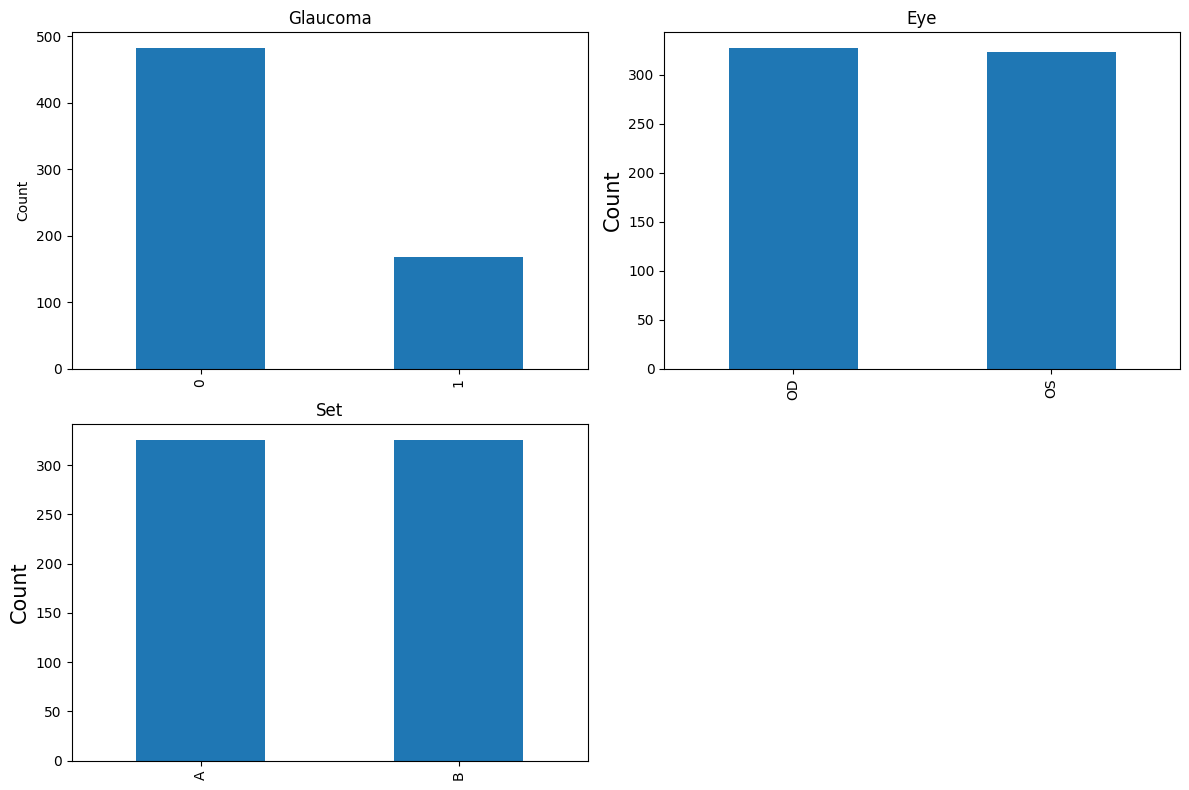

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
glaucoma_data['Glaucoma'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Glaucoma');

ax2 = fig.add_subplot(222)
glaucoma_data['Eye'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Eye');

ax3 = fig.add_subplot(223)
glaucoma_data['Set'].value_counts().plot(kind='bar', ax=ax3)
ax3.set_ylabel('Count', size=15)
ax3.set_title('Set');

plt.tight_layout()
plt.show()

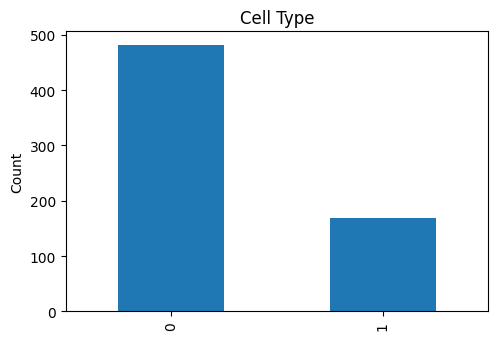

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
glaucoma_data['Glaucoma'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

In [ ]:
from sklearn.utils import resample

In [ ]:
print(glaucoma_data['label'].value_counts())

0    482
1    168
Name: label, dtype: int64


In [ ]:
df_0 = glaucoma_data[glaucoma_data['label']==0]
df_1 = glaucoma_data[glaucoma_data['label']==1]

In [ ]:
df_1.shape

(168, 6)

In [ ]:
n_samples = 500

In [ ]:
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)

In [ ]:
df_1_balanced.shape

(500, 6)

In [ ]:
data_glaucoma_balanced = pd.concat([df_0_balanced,df_1_balanced])

In [ ]:
print(data_glaucoma_balanced['label'].value_counts())

0    500
1    500
Name: label, dtype: int64


In [ ]:
data_glaucoma_balanced.head()

Filename  ExpCDR Eye Set  Glaucoma  label
116       117  0.7171  OD   A         0      0
552       553  0.4173  OS   A         0      0
434       435  0.3758  OS   A         0      0
325       326  0.6243  OD   A         0      0
120       121  0.6830  OD   B         0      0

In [ ]:
data_glaucoma_balanced.shape

(1200, 6)

In [ ]:
images_path = {int(os.path.splitext(os.path.basename(x))[0]): x
               for x in glob(os.path.join('/content/gdrive/MyDrive/glaucomaData/glaucoma/','*','*.jpg'))}

In [ ]:
print(images_path)

{23: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/023.jpg', 22: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/022.jpg', 24: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/024.jpg', 25: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/025.jpg', 34: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/034.jpg', 31: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/031.jpg', 26: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/026.jpg', 40: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/040.jpg', 41: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/041.jpg', 35: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/035.jpg', 30: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/030.jpg', 28: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/028.jpg', 32: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/032.jpg', 29: '/content/gdrive/MyDrive/glaucomaData/glaucoma/Images/029.jpg', 39: '/content/gdrive/MyDrive/glaucomaData/glauc

In [ ]:
data_glaucoma_balanced['path'] = glaucoma_data['Filename'].map(images_path)

In [ ]:
data_glaucoma_balanced.head()

Filename  ExpCDR Eye Set  Glaucoma  label  \
116       117  0.7171  OD   A         0      0   
552       553  0.4173  OS   A         0      0   
434       435  0.3758  OS   A         0      0   
325       326  0.6243  OD   A         0      0   
120       121  0.6830  OD   B         0      0   

                                                  path  
116  /content/gdrive/MyDrive/glaucomaData/glaucoma/...  
552  /content/gdrive/MyDrive/glaucomaData/glaucoma/...  
434  /content/gdrive/MyDrive/glaucomaData/glaucoma/...  
325  /content/gdrive/MyDrive/glaucomaData/glaucoma/...  
120  /content/gdrive/MyDrive/glaucomaData/glaucoma/...

In [ ]:
size = 224

In [ ]:
data_glaucoma_balanced['image'] = data_glaucoma_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((size,size))))

In [ ]:
data_glaucoma_balanced.head()

Filename  ExpCDR Eye Set  Glaucoma  label  \
116       117  0.7171  OD   A         0      0   
552       553  0.4173  OS   A         0      0   
434       435  0.3758  OS   A         0      0   
325       326  0.6243  OD   A         0      0   
120       121  0.6830  OD   B         0      0   

                                                  path  \
116  /content/gdrive/MyDrive/glaucomaData/glaucoma/...   
552  /content/gdrive/MyDrive/glaucomaData/glaucoma/...   
434  /content/gdrive/MyDrive/glaucomaData/glaucoma/...   
325  /content/gdrive/MyDrive/glaucomaData/glaucoma/...   
120  /content/gdrive/MyDrive/glaucomaData/glaucoma/...   

                                                 image  
116  [[[1, 1, 0], [2, 2, 0], [1, 1, 0], [1, 1, 0], ...  
552  [[[1, 1, 0], [1, 1, 1], [1, 1, 0], [1, 1, 0], ...  
434  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 0], ...  
325  [[[1, 1, 1], [0, 0, 0], [1, 1, 1], [1, 1, 1], ...  
120  [[[1, 1, 1], [1, 1, 0], [1, 1, 0], [1, 2, 0], ...

In [ ]:
n_images=4

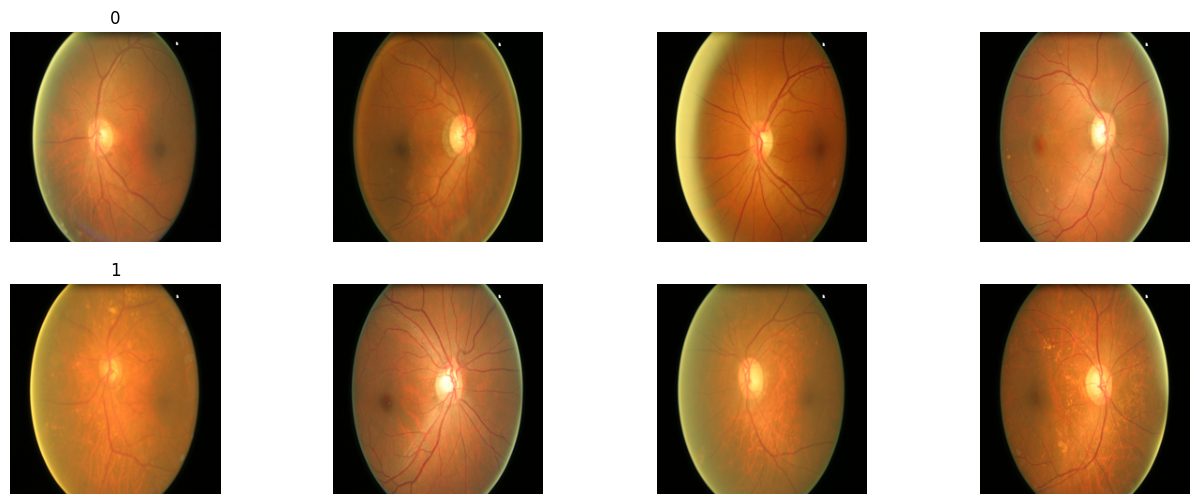

In [ ]:
fig, m_axs = plt.subplots(2, n_images, figsize = (4*n_images, 3*2))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         data_glaucoma_balanced.sort_values(['Glaucoma']).groupby('Glaucoma')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_images, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [ ]:
X = np.asarray(data_glaucoma_balanced['image'].tolist())

In [ ]:
X.shape

(1000, 224, 224, 3)

In [ ]:
Y = data_glaucoma_balanced['label']

In [ ]:
Y.shape

(1000,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
x_train.shape

(750, 224, 224, 3)

In [ ]:
y_test_cat = to_categorical(y_test,num_classes=2)

In [ ]:
y_test_cat.shape

(250, 2)

In [ ]:
y_train_cat = to_categorical(y_train,num_classes=2)

In [ ]:
y_train_cat.shape

(750, 2)

#VGG16

In [ ]:
from keras.applications.vgg16 import preprocess_input as preprocess_input_vgg16

In [ ]:
x_train_vgg16 = preprocess_input_vgg16(x_train)

In [ ]:
x_train_vgg16.shape

(750, 224, 224, 3)

In [ ]:
x_test_vgg16 = preprocess_input_vgg16(x_test)

In [ ]:
x_test_vgg16.shape

(250, 224, 224, 3)

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
model_1_VGG16 = VGG16(weights='imagenet', include_top=False,input_shape=(size,size,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model_1_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in model_1_VGG16.layers:
  layer.trainable = False

In [ ]:
model_1_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.models import Model

In [ ]:
x =Flatten()(model_1_VGG16.output)
x=Dense(512, activation=('relu'))(x)
x=Dense(256, activation=('relu'))(x)
prediction = Dense(2,activation='sigmoid')(x)
model_VGG16 = Model(inputs = model_1_VGG16.input, outputs = prediction)

In [ ]:
model_VGG16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

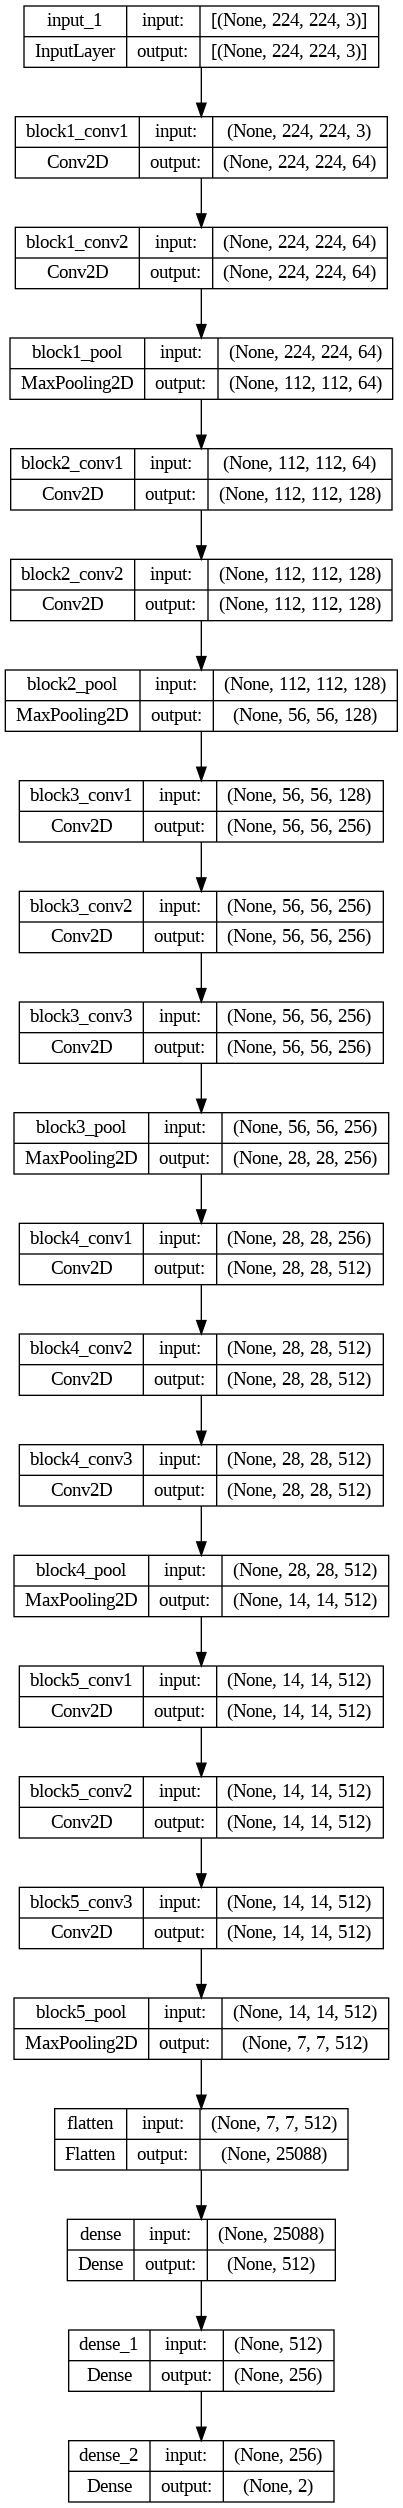

In [ ]:
from keras.utils import plot_model
plot_model(model=model_VGG16, show_shapes= True)

In [ ]:
model_VGG16.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history1 = model_VGG16.fit(x_train_vgg16, y_train_cat, batch_size = 50, epochs = 10, verbose = 1, validation_data = (x_test_vgg16, y_test_cat))

Epoch 1/10
15/15 [==============================] - 7s 346ms/step - loss: 34.1464 - acc: 0.5467 - val_loss: 11.6071 - val_acc: 0.5440
Epoch 2/10
15/15 [==============================] - 4s 302ms/step - loss: 4.3721 - acc: 0.6973 - val_loss: 1.4411 - val_acc: 0.7600
Epoch 3/10
15/15 [==============================] - 5s 315ms/step - loss: 0.7935 - acc: 0.8387 - val_loss: 0.6795 - val_acc: 0.8720
Epoch 4/10
15/15 [==============================] - 5s 316ms/step - loss: 0.3349 - acc: 0.9067 - val_loss: 0.6287 - val_acc: 0.8520
Epoch 5/10
15/15 [==============================] - 5s 314ms/step - loss: 0.0683 - acc: 0.9667 - val_loss: 0.4170 - val_acc: 0.9120
Epoch 6/10
15/15 [==============================] - 5s 308ms/step - loss: 0.0229 - acc: 0.9893 - val_loss: 0.3480 - val_acc: 0.9280
Epoch 7/10
15/15 [==============================] - 5s 327ms/step - loss: 0.0063 - acc: 1.0000 - val_loss: 0.3915 - val_acc: 0.9240
Epoch 8/10
15/15 [==============================] - 5s 318ms/step - loss: 

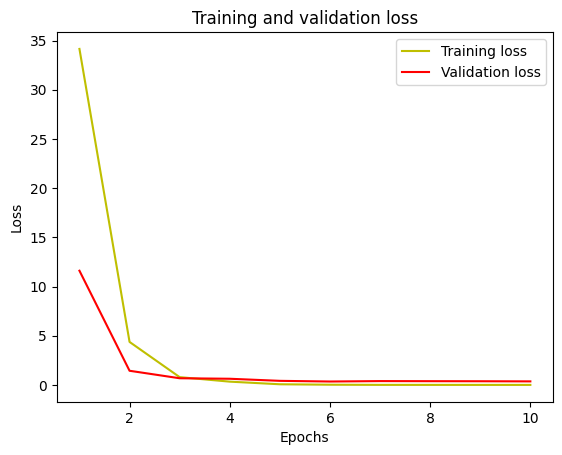

In [ ]:
loss = history1.history['loss']
val_loss_1 = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss_1, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

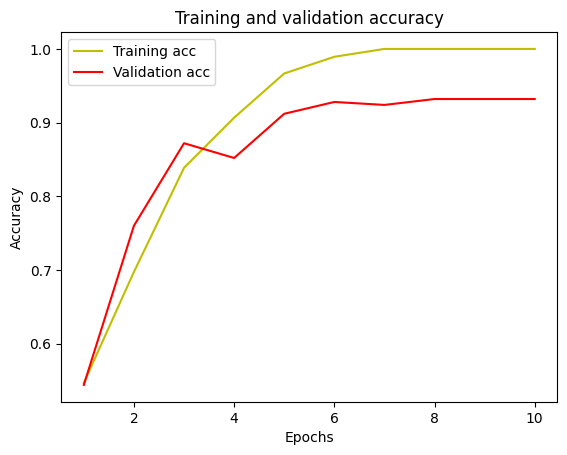

In [ ]:
acc = history1.history['acc']
val_acc_1 = history1.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc_1, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model_VGG16.save('saved_models/model_VGG16.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pred_VGG16 = np.argmax(model_VGG16.predict(x_test_vgg16),axis=-1)

8/8 [==============================] - 1s 125ms/step


In [ ]:
pred_VGG16.shape

(250,)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,roc_auc_score,recall_score

In [ ]:
accuracy_VGG16 = accuracy_score(y_test, pred_VGG16)
auc_vgg16 = roc_auc_score(y_test,pred_VGG16)
se_vgg16 = recall_score(y_test,pred_VGG16)

In [ ]:
print('Accuracy Score = ', accuracy_VGG16*100,'%')
print('AUC = ', auc_vgg16*100,'%')
print('sensibility = ', se_vgg16*100,'%')

Accuracy Score =  93.2 %
AUC =  93.12884221311477 %
sensibility =  96.09375 %


In [ ]:
cm_vgg16 = confusion_matrix(y_test, pred_VGG16)

<Axes: >

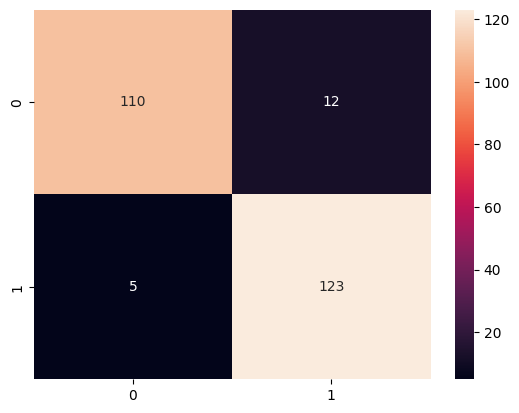

In [ ]:
sns.heatmap(cm_vgg16,annot=True,fmt='g')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report_vgg16 = classification_report(y_test,pred_VGG16)

In [ ]:
print(report_vgg16)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       122
           1       0.91      0.96      0.94       128

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



Text(0, 0.5, 'Fraction of incorrect predictions')

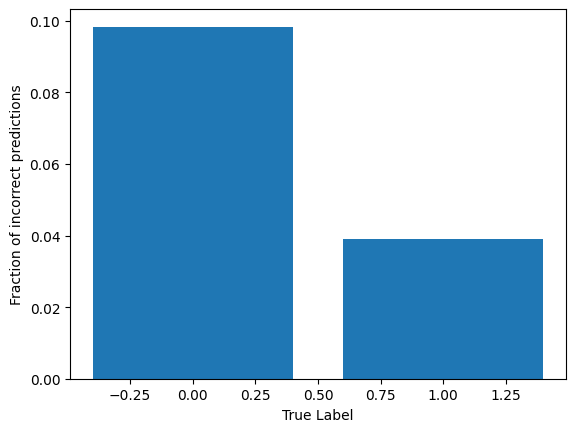

In [ ]:
incorr_fraction = 1 - np.diag(cm_vgg16) / np.sum(cm_vgg16, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

#VGG19

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19

In [ ]:
x_train_vgg19 = preprocess_input_vgg19(x_train)

In [ ]:
x_test_vgg19 = preprocess_input_vgg19(x_test)

In [ ]:
model_2_VGG19 = VGG19(weights='imagenet', include_top=False,input_shape=(size,size,3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
model_2_VGG19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in model_2_VGG19.layers:
  layer.trainable = False

In [ ]:
model_2_VGG19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
y =Flatten()(model_2_VGG19.output)
y=Dense(512, activation=('relu'))(y)
y=Dense(256, activation=('relu'))(y)
prediction_2 = Dense(2,activation='sigmoid')(y)
model_VGG19 = Model(inputs = model_2_VGG19.input, outputs = prediction_2)

In [ ]:
model_VGG19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

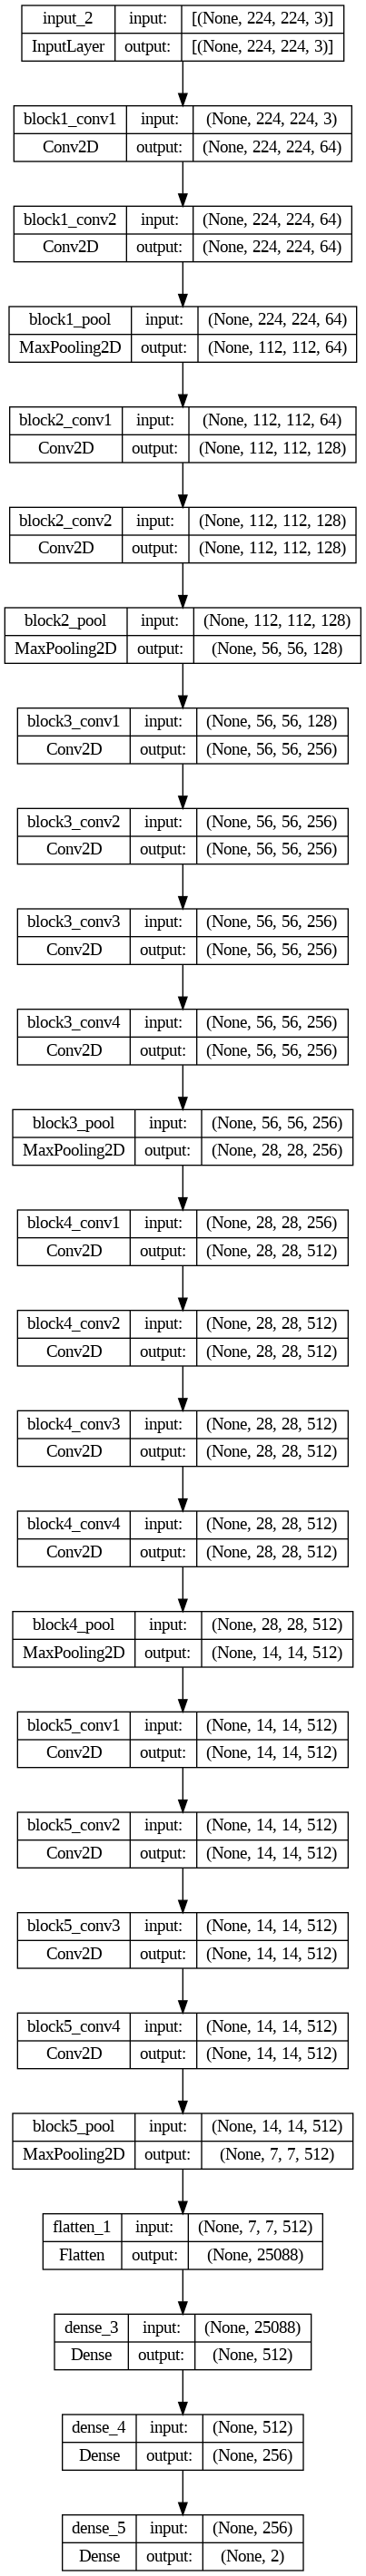

In [ ]:
plot_model(model=model_VGG19, show_shapes= True)

In [ ]:
model_VGG19.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history2 = model_VGG19.fit(x_train_vgg19, y_train_cat, batch_size = 30, epochs = 10, verbose = 1, validation_data = (x_test_vgg19, y_test_cat))

Epoch 1/10
25/25 [==============================] - 16s 395ms/step - loss: 26.7006 - acc: 0.5560 - val_loss: 4.0831 - val_acc: 0.6880
Epoch 2/10
25/25 [==============================] - 7s 267ms/step - loss: 2.0151 - acc: 0.7653 - val_loss: 1.1665 - val_acc: 0.7640
Epoch 3/10
25/25 [==============================] - 5s 205ms/step - loss: 1.0648 - acc: 0.8280 - val_loss: 1.1017 - val_acc: 0.8520
Epoch 4/10
25/25 [==============================] - 5s 206ms/step - loss: 0.4427 - acc: 0.9080 - val_loss: 1.0498 - val_acc: 0.8400
Epoch 5/10
25/25 [==============================] - 6s 261ms/step - loss: 0.0830 - acc: 0.9747 - val_loss: 0.6842 - val_acc: 0.8880
Epoch 6/10
25/25 [==============================] - 5s 200ms/step - loss: 0.0197 - acc: 0.9947 - val_loss: 0.4777 - val_acc: 0.9360
Epoch 7/10
25/25 [==============================] - 5s 205ms/step - loss: 0.0203 - acc: 0.9947 - val_loss: 0.4494 - val_acc: 0.9520
Epoch 8/10
25/25 [==============================] - 5s 199ms/step - loss: 

In [ ]:
model_VGG19.save('saved_models/model_VGG19.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


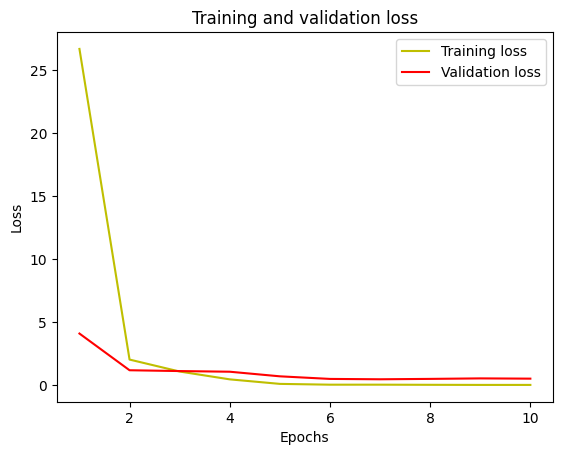

In [ ]:
loss = history2.history['loss']
val_loss_2 = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss_2, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

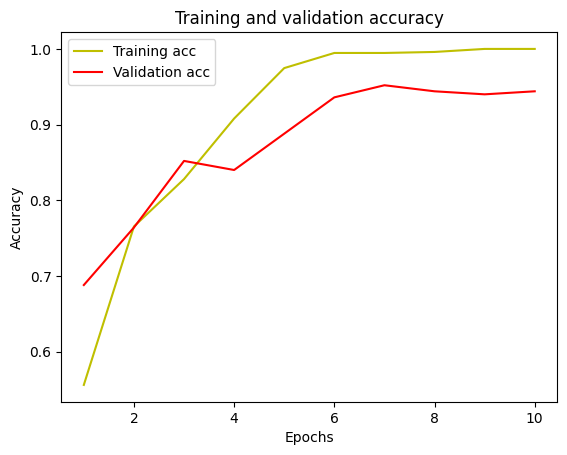

In [ ]:
acc = history2.history['acc']
val_acc_2 = history2.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc_2, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred_VGG19 = np.argmax(model_VGG19.predict(x_test_vgg19),axis=-1)

8/8 [==============================] - 1s 153ms/step


In [ ]:
accuracy_VGG19 = accuracy_score(y_test, pred_VGG19)
auc_vgg19 = roc_auc_score(y_test,pred_VGG19)
se_vgg19 = recall_score(y_test,pred_VGG19)

In [ ]:
print('Accuracy Score = ', accuracy_VGG19*100)
print('AUC = ', auc_vgg19*100)
print('sensibility = ', se_vgg19*100)

Accuracy Score =  94.39999999999999
AUC =  94.35835040983606
sensibility =  96.09375


In [ ]:
cm_vgg19 = confusion_matrix(y_test, pred_VGG19)

<Axes: >

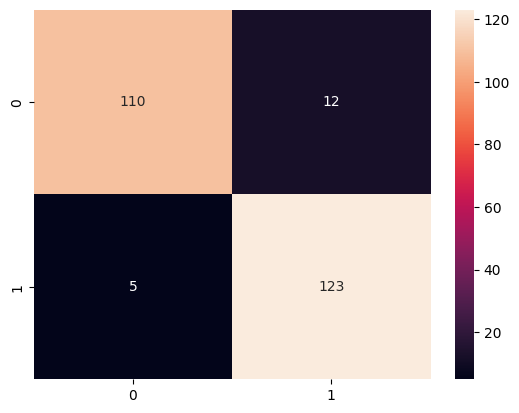

In [ ]:
sns.heatmap(cm_vgg16,annot=True,fmt='g')

In [ ]:
report_vgg19 = classification_report(y_test,pred_VGG19)

In [ ]:
print(report_vgg19)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       122
           1       0.93      0.96      0.95       128

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



Text(0, 0.5, 'Fraction of incorrect predictions')

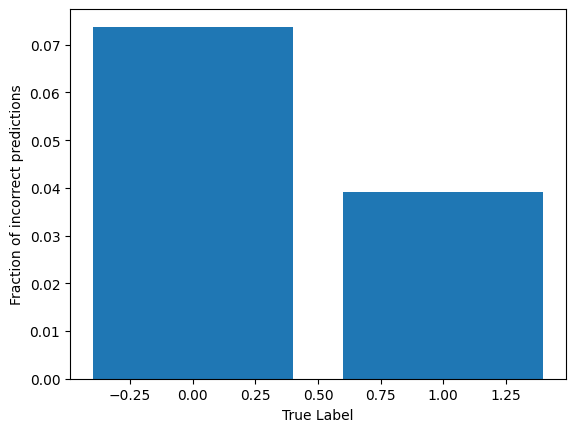

In [ ]:
incorr_fraction = 1 - np.diag(cm_vgg19) / np.sum(cm_vgg19, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

#Inception v3

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as preprocess_input_v3

In [ ]:
x_train_v3 = preprocess_input_v3(x_train)
x_test_v3 = preprocess_input_v3(x_test)

In [ ]:
model_3_inception_V3 =InceptionV3(weights='imagenet', include_top=False,input_shape=(size,size,3))

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in model_3_inception_V3.layers:
  layer.trainable=False

In [ ]:
model_3_inception_V3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
z =Flatten()(model_3_inception_V3.output)
z=Dense(512, activation=('relu'))(z)
z=Dense(256, activation=('relu'))(z)
prediction_3 = Dense(2,activation='sigmoid')(z)
model_inception_v3 = Model(inputs = model_3_inception_V3.input, outputs = prediction_3)

In [ ]:
model_inception_v3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [ ]:
plot_model(model=model_inception_v3, show_shapes= True)

In [ ]:
model_inception_v3.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history3 = model_inception_v3.fit(x_train_v3, y_train_cat, batch_size = 30, epochs = 10, verbose = 1, validation_data = (x_test_v3, y_test_cat))

Epoch 1/10
25/25 [==============================] - 13s 245ms/step - loss: 7.2837 - acc: 0.5947 - val_loss: 4.8825 - val_acc: 0.6200
Epoch 2/10
25/25 [==============================] - 2s 99ms/step - loss: 1.0946 - acc: 0.7880 - val_loss: 0.6870 - val_acc: 0.8120
Epoch 3/10
25/25 [==============================] - 3s 106ms/step - loss: 0.4315 - acc: 0.8707 - val_loss: 0.4469 - val_acc: 0.8720
Epoch 4/10
25/25 [==============================] - 3s 103ms/step - loss: 0.0738 - acc: 0.9667 - val_loss: 0.3146 - val_acc: 0.9280
Epoch 5/10
25/25 [==============================] - 2s 97ms/step - loss: 0.0294 - acc: 0.9907 - val_loss: 0.3124 - val_acc: 0.9200
Epoch 6/10
25/25 [==============================] - 2s 97ms/step - loss: 0.0128 - acc: 0.9987 - val_loss: 0.3249 - val_acc: 0.9280
Epoch 7/10
25/25 [==============================] - 2s 100ms/step - loss: 0.0112 - acc: 0.9987 - val_loss: 0.3715 - val_acc: 0.9200
Epoch 8/10
25/25 [==============================] - 2s 97ms/step - loss: 0.005

In [ ]:
model_inception_v3.save('saved_models/model_inception_v3.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


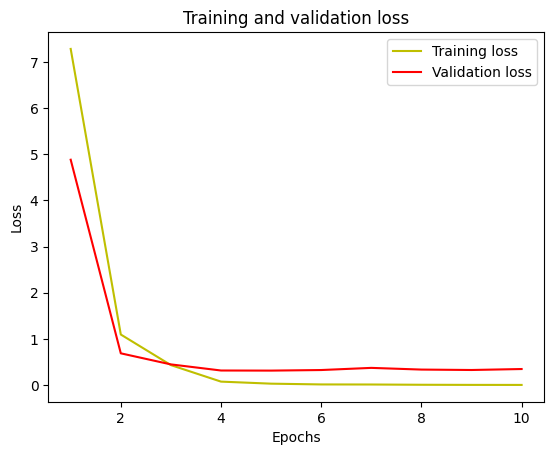

In [ ]:
loss = history3.history['loss']
val_loss_3 = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss_3, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

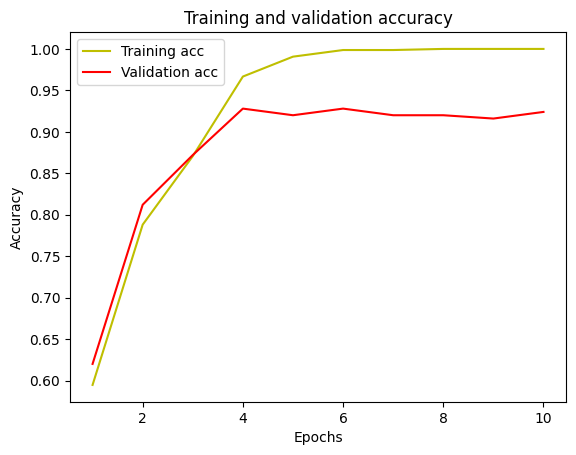

In [ ]:
acc = history3.history['acc']
val_acc_3 = history3.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc_3, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred_v3 = np.argmax(model_inception_v3.predict(x_test_v3),axis=-1)

8/8 [==============================] - 5s 295ms/step


In [ ]:
accuracy_v3 = accuracy_score(y_test, pred_v3)
auc_v3 = roc_auc_score(y_test,pred_v3)
se_v3 = recall_score(y_test,pred_v3)

In [ ]:
print('Accuracy Score = ', accuracy_v3*100)
print('AUC = ', auc_v3*100)
print('sensibility = ', se_v3*100)

Accuracy Score =  92.4
AUC =  92.28995901639344
sensibility =  96.875


<Axes: >

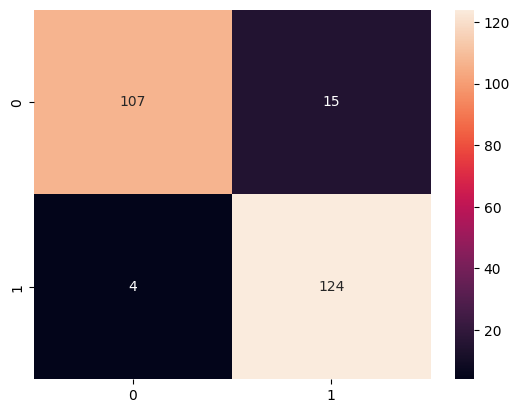

In [ ]:
cm_v3 = confusion_matrix(y_test, pred_v3)
sns.heatmap(cm_v3,annot=True,fmt='g')

In [ ]:
report_v3 = classification_report(y_test,pred_v3)
print(report_v3)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       122
           1       0.89      0.97      0.93       128

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250



Text(0, 0.5, 'Fraction of incorrect predictions')

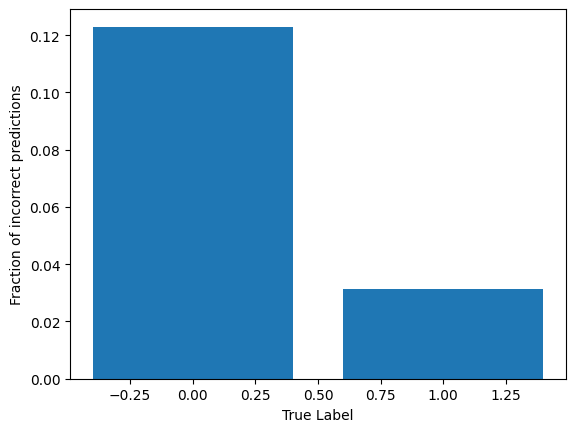

In [ ]:
incorr_fraction = 1 - np.diag(cm_v3) / np.sum(cm_v3, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

#ResNet50

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as preprocess_input_res

In [ ]:
x_train_res = preprocess_input_res(x_train)
x_test_res = preprocess_input_res(x_test)

In [ ]:
model_4_resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(size,size,3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in model_4_resnet50.layers:
    layer.trainable = False

In [ ]:
model_4_resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
u =Flatten()(model_4_resnet50.output)
u=Dense(512, activation=('relu'))(u)
u=Dense(256, activation=('relu'))(u)
prediction_4 = Dense(2,activation='sigmoid')(u)
model_res50 = Model(inputs = model_4_resnet50.input, outputs = prediction_4)

In [ ]:
model_res50.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

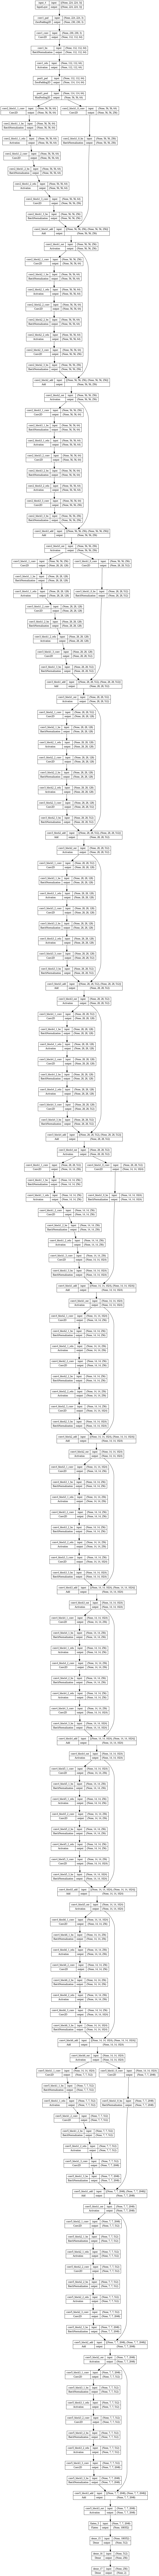

In [ ]:
plot_model(model=model_res50, show_shapes= True)

In [ ]:
model_res50.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])

In [ ]:
history4 = model_res50.fit(x_train_res, y_train_cat, batch_size = 30, epochs = 10, verbose = 1, validation_data = (x_test_res, y_test_cat))

Epoch 1/10
25/25 [==============================] - 12s 290ms/step - loss: 17.1740 - acc: 0.6080 - val_loss: 1.8052 - val_acc: 0.7480
Epoch 2/10
25/25 [==============================] - 4s 156ms/step - loss: 0.8220 - acc: 0.8200 - val_loss: 0.8586 - val_acc: 0.8160
Epoch 3/10
25/25 [==============================] - 3s 137ms/step - loss: 0.2797 - acc: 0.9240 - val_loss: 0.2558 - val_acc: 0.9080
Epoch 4/10
25/25 [==============================] - 4s 162ms/step - loss: 0.1122 - acc: 0.9640 - val_loss: 0.2272 - val_acc: 0.9440
Epoch 5/10
25/25 [==============================] - 4s 157ms/step - loss: 0.0762 - acc: 0.9787 - val_loss: 0.7033 - val_acc: 0.8480
Epoch 6/10
25/25 [==============================] - 3s 136ms/step - loss: 0.0555 - acc: 0.9813 - val_loss: 0.3487 - val_acc: 0.9240
Epoch 7/10
25/25 [==============================] - 3s 137ms/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.3911 - val_acc: 0.9240
Epoch 8/10
25/25 [==============================] - 3s 140ms/step - loss: 

In [ ]:
model_res50.save('saved_models/model_res50.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


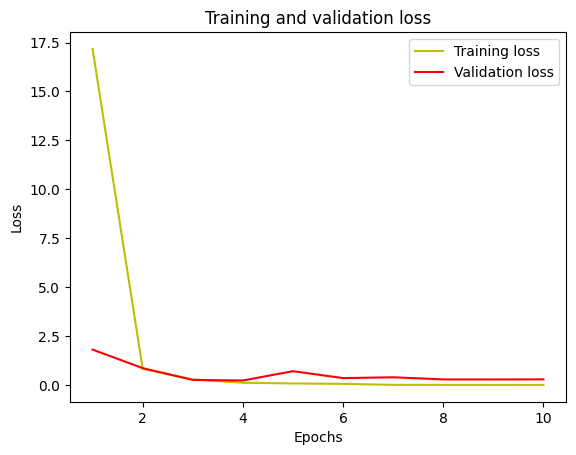

In [ ]:
loss = history4.history['loss']
val_loss_4 = history4.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss_4, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

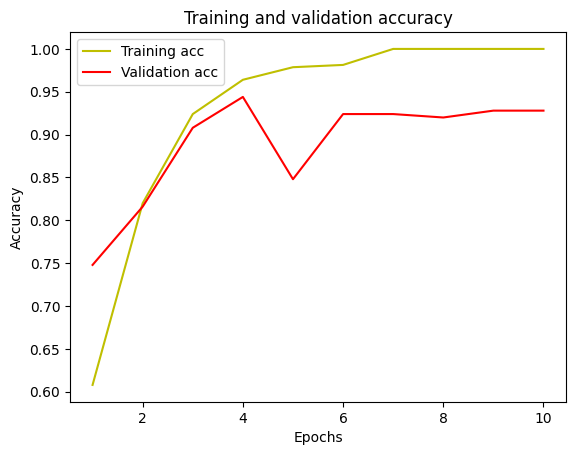

In [ ]:
acc = history4.history['acc']
val_acc_4 = history4.history['val_acc']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc_4, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred_RES50 = np.argmax(model_res50.predict(x_test_res),axis=-1)

8/8 [==============================] - 4s 231ms/step


In [ ]:
accuracy_Res = accuracy_score(y_test, pred_RES50)
auc_Res = roc_auc_score(y_test,pred_RES50)
se_Res = recall_score(y_test,pred_RES50)

In [ ]:
print('Accuracy Score = ', accuracy_Res*100)
print('AUC = ', auc_Res*100)
print('sensibility = ', se_Res*100)

Accuracy Score =  92.80000000000001
AUC =  92.75742827868854
sensibility =  94.53125


<Axes: >

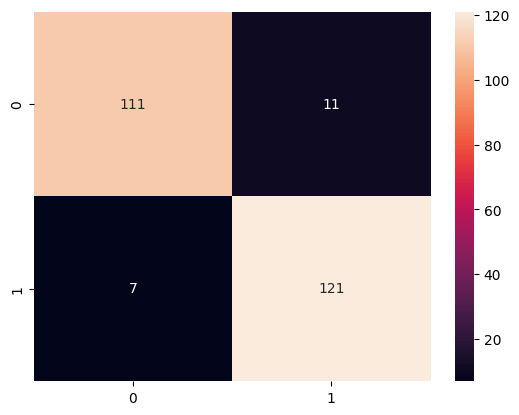

In [ ]:
cm_Res = confusion_matrix(y_test, pred_RES50)
sns.heatmap(cm_Res,annot=True,fmt='g')

In [ ]:
report_Res = classification_report(y_test,pred_RES50)
print(report_Res)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       122
           1       0.92      0.95      0.93       128

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



Text(0, 0.5, 'Fraction of incorrect predictions')

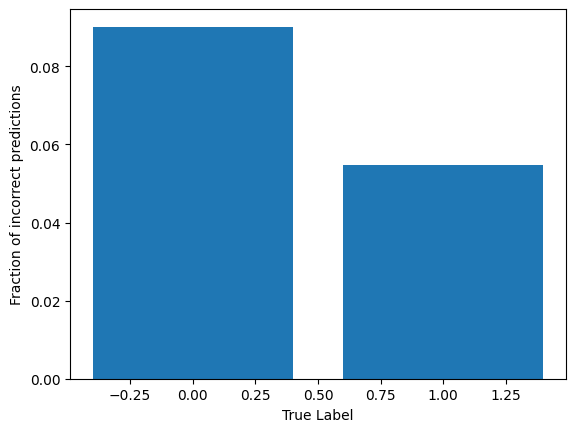

In [ ]:
incorr_fraction = 1 - np.diag(cm_Res) / np.sum(cm_Res, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

#summary of 4 pretrained models

In [ ]:
import pandas as pd

In [ ]:
data = {
    'Model': ['VGG16', 'VGG19', 'Incption_V3', 'ResNet50'],
    'Accuracy': [accuracy_VGG16, accuracy_VGG19, accuracy_v3, accuracy_Res],
    'AUC': [auc_vgg16,auc_vgg19,auc_v3,auc_Res],
    'Sensibility': [se_vgg16,se_vgg19,se_v3,se_Res]
}

pretrained_table = pd.DataFrame(data)

In [ ]:
pretrained_table.head()

Model  Accuracy       AUC  Sensibility
0        VGG16     0.932  0.931288     0.960938
1        VGG19     0.944  0.943584     0.960938
2  Incption_V3     0.924  0.922900     0.968750
3     ResNet50     0.928  0.927574     0.945312

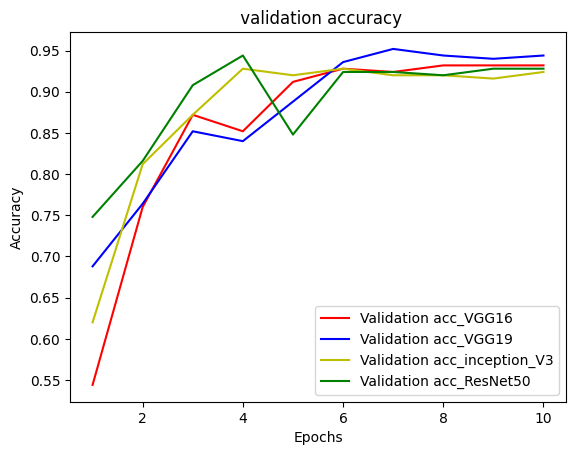

In [ ]:
val_acc1 = history1.history['val_acc']

val_acc_2 = history2.history['val_acc']

val_acc_3 = history3.history['val_acc']

val_acc_4 = history4.history['val_acc']


plt.plot(epochs, val_acc_1, 'r', label='Validation acc_VGG16')
plt.plot(epochs, val_acc_2, 'b', label='Validation acc_VGG19')
plt.plot(epochs, val_acc_3, 'y', label='Validation acc_inception_V3')
plt.plot(epochs, val_acc_4, 'g', label='Validation acc_ResNet50')
plt.title(' validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

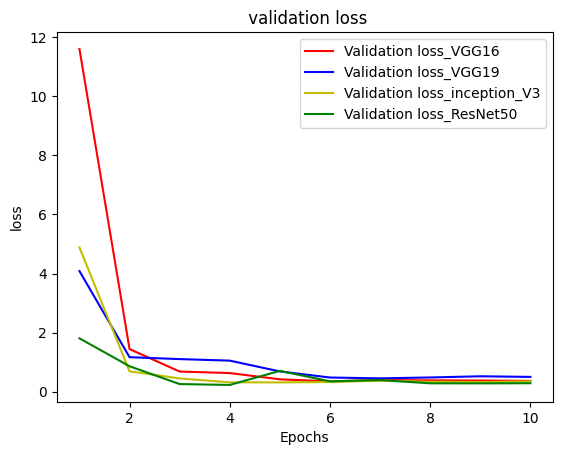

In [ ]:
val_loss_1 = history1.history['val_loss']

val_loss_2 = history2.history['val_loss']

val_loss_3 = history3.history['val_loss']

val_loss_4 = history4.history['val_loss']


plt.plot(epochs, val_loss_1, 'r', label='Validation loss_VGG16')
plt.plot(epochs, val_loss_2, 'b', label='Validation loss_VGG19')
plt.plot(epochs, val_loss_3, 'y', label='Validation loss_inception_V3')
plt.plot(epochs, val_loss_4, 'g', label='Validation loss_ResNet50')
plt.title(' validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Ensemble lr average weighted

In [ ]:
from keras.saving import load_model

In [ ]:
model1 = load_model('saved_models/model_VGG16.hdf5',compile=False)
model2 = load_model('saved_models/model_VGG19.hdf5',compile=False)
model3 = load_model('saved_models/model_inception_v3.hdf5',compile=False)
model4 = load_model('saved_models/model_res50.hdf5',compile=False)

In [ ]:
pred1 = model1.predict(x_test_vgg16)
pred2 = model2.predict(x_test_vgg19)
pred3 = model3.predict(x_test_v3)
pred4 = model4.predict(x_test_res)

8/8 [==============================] - 2s 89ms/step


In [ ]:
pred1.shape,pred2.shape,pred3.shape,pred4.shape

((250, 2), (250, 2), (250, 2), (250, 2))

In [ ]:
preds = np.array([pred1,pred2,pred3,pred4])

In [ ]:
preds.shape

(4, 250, 2)

In [ ]:
summed =np.sum(preds,axis=0)

In [ ]:
summed.shape

(250, 2)

In [ ]:
ensemble_prediction = np.argmax(summed,axis=1)

In [ ]:
ensemble_prediction.shape

(250,)

In [ ]:
prediction1 = np.argmax(model1.predict(x_test_vgg16),axis=-1)
prediction2 = np.argmax(model2.predict(x_test_vgg19),axis=-1)
prediction3 = np.argmax(model3.predict(x_test_v3),axis=-1)
prediction4 = np.argmax(model4.predict(x_test_res),axis=-1)

8/8 [==============================] - 1s 88ms/step


In [ ]:
accuracy1_VGG16 = accuracy_score(y_test,prediction1)
accuracy2_VGG19 = accuracy_score(y_test,prediction2)
accuracy3_inception_v3 = accuracy_score(y_test,prediction3)
accuracy4_resnet_50 = accuracy_score(y_test,prediction4)
ensemble_accuracy = accuracy_score(y_test,ensemble_prediction)

In [ ]:
print('Accuracy Score for model1_VGG16 = ', accuracy1_VGG16)
print('Accuracy Score for model2_VGG19 = ', accuracy2_VGG19)
print('Accuracy Score for model3_inceptionV3 = ', accuracy3_inception_v3)
print('Accuracy Score for model4_renet50 = ', accuracy4_resnet_50 )
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

Accuracy Score for model1_VGG16 =  0.932
Accuracy Score for model2_VGG19 =  0.944
Accuracy Score for model3_inceptionV3 =  0.924
Accuracy Score for model4_renet50 =  0.928
Accuracy Score for average ensemble =  0.924


In [ ]:
ensemble_auc = roc_auc_score(y_test,ensemble_prediction)
ensemble_se = recall_score(y_test,ensemble_prediction)

In [ ]:
print('auc Score for average ensemble = ', ensemble_auc)
print('SE Score for average ensemble = ', ensemble_se)

auc Score for average ensemble =  0.9234759221311475
SE Score for average ensemble =  0.9453125


#ensemble lr ideal average weighted

In [ ]:
df = pd.DataFrame([])

In [ ]:
for w1 in range(0,5):
  for w2 in range(0,5):
    for w3 in range(0,5):
      for w4 in range(0,5):
        wts = [w1/10.,w2/10.,w3/10.,w4/10.]
        wted_preds1 = np.tensordot(preds,wts,axes=((0),(0)))
        wted_ensemble_pred = np.argmax(wted_preds1,axis=1)
        weighted_accuracy = accuracy_score(y_test,wted_ensemble_pred)
        print("Now predciting for weights :", w1/10., w2/10., w3/10.,w4/10., " : ACC = ", weighted_accuracy)
        df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
                                     'wt4':wts[3],'acc':weighted_accuracy*100},index=[0]),ignore_index=True)


Now predciting for weights : 0.0 0.0 0.0 0.0  : ACC =  0.488
Now predciting for weights : 0.0 0.0 0.0 0.1  : ACC =  0.928
Now predciting for weights : 0.0 0.0 0.0 0.2  : ACC =  0.928
Now predciting for weights : 0.0 0.0 0.0 0.3  : ACC =  0.928
Now predciting for weights : 0.0 0.0 0.0 0.4  : ACC =  0.928
Now predciting for weights : 0.0 0.0 0.1 0.0  : ACC =  0.924
Now predciting for weights : 0.0 0.0 0.1 0.1  : ACC =  0.924
Now predciting for weights : 0.0 0.0 0.1 0.2  : ACC =  0.924
Now predciting for weights : 0.0 0.0 0.1 0.3  : ACC =  0.928
Now predciting for weights : 0.0 0.0 0.1 0.4  : ACC =  0.928
Now predciting for weights : 0.0 0.0 0.2 0.0  : ACC =  0.924
Now predciting for weights : 0.0 0.0 0.2 0.1  : ACC =  0.924
Now predciting for weights : 0.0 0.0 0.2 0.2  : ACC =  0.924
Now predciting for weights : 0.0 0.0 0.2 0.3  : ACC =  0.924
Now predciting for weights : 0.0 0.0 0.2 0.4  : ACC =  0.924
Now predciting for weights : 0.0 0.0 0.3 0.0  : ACC =  0.924
Now predciting for weigh

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

0.0  : ACC =  0.916
Now predciting for weights : 0.0 0.1 0.3 0.1  : ACC =  0.924
Now predciting for weights : 0.0 0.1 0.3 0.2  : ACC =  0.924
Now predciting for weights : 0.0 0.1 0.3 0.3  : ACC =  0.924
Now predciting for weights : 0.0 0.1 0.3 0.4  : ACC =  0.924
Now predciting for weights : 0.0 0.1 0.4 0.0  : ACC =  0.916
Now predciting for weights : 0.0 0.1 0.4 0.1  : ACC =  0.92
Now predciting for weights : 0.0 0.1 0.4 0.2  : ACC =  0.924
Now predciting for weights : 0.0 0.1 0.4 0.3  : ACC =  0.924
Now predciting for weights : 0.0 0.1 0.4 0.4  : ACC =  0.924
Now predciting for weights : 0.0 0.2 0.0 0.0  : ACC =  0.944
Now predciting for weights : 0.0 0.2 0.0 0.1  : ACC =  0.928
Now predciting for weights : 0.0 0.2 0.0 0.2  : ACC =  0.928
Now predciting for weights : 0.0 0.2 0.0 0.3  : ACC =  0.928
Now predciting for weights : 0.0 0.2 0.0 0.4  : ACC =  0.928
Now predciting for weights : 0.0 0.2 0.1 0.0  : ACC =  0.92
Now predciting for weights : 0.0 0.2 0.1 0.1  : ACC =  0.924
Now pr

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

0.3  : ACC =  0.924
Now predciting for weights : 0.0 0.3 0.2 0.4  : ACC =  0.924
Now predciting for weights : 0.0 0.3 0.3 0.0  : ACC =  0.92
Now predciting for weights : 0.0 0.3 0.3 0.1  : ACC =  0.924
Now predciting for weights : 0.0 0.3 0.3 0.2  : ACC =  0.924
Now predciting for weights : 0.0 0.3 0.3 0.3  : ACC =  0.924
Now predciting for weights : 0.0 0.3 0.3 0.4  : ACC =  0.924
Now predciting for weights : 0.0 0.3 0.4 0.0  : ACC =  0.92
Now predciting for weights : 0.0 0.3 0.4 0.1  : ACC =  0.92
Now predciting for weights : 0.0 0.3 0.4 0.2  : ACC =  0.924
Now predciting for weights : 0.0 0.3 0.4 0.3  : ACC =  0.924
Now predciting for weights : 0.0 0.3 0.4 0.4  : ACC =  0.924
Now predciting for weights : 0.0 0.4 0.0 0.0  : ACC =  0.944
Now predciting for weights : 0.0 0.4 0.0 0.1  : ACC =  0.928
Now predciting for weights : 0.0 0.4 0.0 0.2  : ACC =  0.928
Now predciting for weights : 0.0 0.4 0.0 0.3  : ACC =  0.928
Now predciting for weights : 0.0 0.4 0.0 0.4  : ACC =  0.928
Now pre

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

Now predciting for weights : 0.1 0.0 0.2 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.2 0.3  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.2 0.4  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.3 0.0  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.3 0.1  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.3 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.3 0.3  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.3 0.4  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.4 0.0  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.4 0.1  : ACC =  0.92
Now predciting for weights : 0.1 0.0 0.4 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.4 0.3  : ACC =  0.924
Now predciting for weights : 0.1 0.0 0.4 0.4  : ACC =  0.924
Now predciting for weights : 0.1 0.1 0.0 0.0  : ACC =  0.944
Now predciting for weights : 0.1 0.1 0.0 0.1  : ACC =  0.928
Now predciting for weights : 0.1 0.1 0.0 0.2  : ACC =  0.928
Now predciting for weight

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.1 0.3  : ACC =  0.928
Now predciting for weights : 0.1 0.2 0.1 0.4  : ACC =  0.928
Now predciting for weights : 0.1 0.2 0.2 0.0  : ACC =  0.92
Now predciting for weights : 0.1 0.2 0.2 0.1  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.2 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.2 0.3  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.2 0.4  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.3 0.0  : ACC =  0.92
Now predciting for weights : 0.1 0.2 0.3 0.1  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.3 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.3 0.3  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.3 0.4  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.4 0.0  : ACC =  0.92
Now predciting for weights : 0.1 0.2 0.4 0.1  : ACC =  0.92
Now predciting for weights : 0.1 0.2 0.4 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.2 0.4 0.3  : ACC =  0.924
Now pre

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

Now predciting for weights : 0.1 0.4 0.1 0.0  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.1 0.1  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.1 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.1 0.3  : ACC =  0.928
Now predciting for weights : 0.1 0.4 0.1 0.4  : ACC =  0.928
Now predciting for weights : 0.1 0.4 0.2 0.0  : ACC =  0.92
Now predciting for weights : 0.1 0.4 0.2 0.1  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.2 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.2 0.3  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.2 0.4  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.3 0.0  : ACC =  0.92
Now predciting for weights : 0.1 0.4 0.3 0.1  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.3 0.2  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.3 0.3  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.3 0.4  : ACC =  0.924
Now predciting for weights : 0.1 0.4 0.4 0.0  : ACC =  0.92
Now predciting for weights 

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

0.3  : ACC =  0.928
Now predciting for weights : 0.2 0.1 0.0 0.4  : ACC =  0.928
Now predciting for weights : 0.2 0.1 0.1 0.0  : ACC =  0.92
Now predciting for weights : 0.2 0.1 0.1 0.1  : ACC =  0.924
Now predciting for weights : 0.2 0.1 0.1 0.2  : ACC =  0.924
Now predciting for weights : 0.2 0.1 0.1 0.3  : ACC =  0.928
Now predciting for weights : 0.2 0.1 0.1 0.4  : ACC =  0.928
Now predciting for weights : 0.2 0.1 0.2 0.0  : ACC =  0.92
Now predciting for weights : 0.2 0.1 0.2 0.1  : ACC =  0.924
Now predciting for weights : 0.2 0.1 0.2 0.2  : ACC =  0.924
Now predciting for weights : 0.2 0.1 0.2 0.3  : ACC =  0.924
Now predciting for weights : 0.2 0.1 0.2 0.4  : ACC =  0.924
Now predciting for weights : 0.2 0.1 0.3 0.0  : ACC =  0.916
Now predciting for weights : 0.2 0.1 0.3 0.1  : ACC =  0.924
Now predciting for weights : 0.2 0.1 0.3 0.2  : ACC =  0.924
Now predciting for weights : 0.2 0.1 0.3 0.3  : ACC =  0.924
Now predciting for weights : 0.2 0.1 0.3 0.4  : ACC =  0.924
Now pr

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

Now predciting for weights : 0.2 0.3 0.0 0.2  : ACC =  0.928
Now predciting for weights : 0.2 0.3 0.0 0.3  : ACC =  0.928
Now predciting for weights : 0.2 0.3 0.0 0.4  : ACC =  0.928
Now predciting for weights : 0.2 0.3 0.1 0.0  : ACC =  0.924
Now predciting for weights : 0.2 0.3 0.1 0.1  : ACC =  0.924
Now predciting for weights : 0.2 0.3 0.1 0.2  : ACC =  0.924
Now predciting for weights : 0.2 0.3 0.1 0.3  : ACC =  0.928
Now predciting for weights : 0.2 0.3 0.1 0.4  : ACC =  0.928
Now predciting for weights : 0.2 0.3 0.2 0.0  : ACC =  0.92
Now predciting for weights : 0.2 0.3 0.2 0.1  : ACC =  0.924
Now predciting for weights : 0.2 0.3 0.2 0.2  : ACC =  0.924
Now predciting for weights : 0.2 0.3 0.2 0.3  : ACC =  0.924
Now predciting for weights : 0.2 0.3 0.2 0.4  : ACC =  0.924
Now predciting for weights : 0.2 0.3 0.3 0.0  : ACC =  0.92
Now predciting for weights : 0.2 0.3 0.3 0.1  : ACC =  0.924
Now predciting for weights : 0.2 0.3 0.3 0.2  : ACC =  0.924
Now predciting for weights

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

Now predciting for weights : 0.3 0.0 0.0 0.0  : ACC =  0.932
Now predciting for weights : 0.3 0.0 0.0 0.1  : ACC =  0.928
Now predciting for weights : 0.3 0.0 0.0 0.2  : ACC =  0.928
Now predciting for weights : 0.3 0.0 0.0 0.3  : ACC =  0.928
Now predciting for weights : 0.3 0.0 0.0 0.4  : ACC =  0.928
Now predciting for weights : 0.3 0.0 0.1 0.0  : ACC =  0.924
Now predciting for weights : 0.3 0.0 0.1 0.1  : ACC =  0.924
Now predciting for weights : 0.3 0.0 0.1 0.2  : ACC =  0.924
Now predciting for weights : 0.3 0.0 0.1 0.3  : ACC =  0.928
Now predciting for weights : 0.3 0.0 0.1 0.4  : ACC =  0.928
Now predciting for weights : 0.3 0.0 0.2 0.0  : ACC =  0.924
Now predciting for weights : 0.3 0.0 0.2 0.1  : ACC =  0.924
Now predciting for weights : 0.3 0.0 0.2 0.2  : ACC =  0.924
Now predciting for weights : 0.3 0.0 0.2 0.3  : ACC =  0.924
Now predciting for weights : 0.3 0.0 0.2 0.4  : ACC =  0.924
Now predciting for weights : 0.3 0.0 0.3 0.0  : ACC =  0.924
Now predciting for weigh

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

Now predciting for weights : 0.3 0.1 0.4 0.3  : ACC =  0.924
Now predciting for weights : 0.3 0.1 0.4 0.4  : ACC =  0.924
Now predciting for weights : 0.3 0.2 0.0 0.0  : ACC =  0.944
Now predciting for weights : 0.3 0.2 0.0 0.1  : ACC =  0.928
Now predciting for weights : 0.3 0.2 0.0 0.2  : ACC =  0.928
Now predciting for weights : 0.3 0.2 0.0 0.3  : ACC =  0.928
Now predciting for weights : 0.3 0.2 0.0 0.4  : ACC =  0.928
Now predciting for weights : 0.3 0.2 0.1 0.0  : ACC =  0.92
Now predciting for weights : 0.3 0.2 0.1 0.1  : ACC =  0.924
Now predciting for weights : 0.3 0.2 0.1 0.2  : ACC =  0.924
Now predciting for weights : 0.3 0.2 0.1 0.3  : ACC =  0.928
Now predciting for weights : 0.3 0.2 0.1 0.4  : ACC =  0.928
Now predciting for weights : 0.3 0.2 0.2 0.0  : ACC =  0.92
Now predciting for weights : 0.3 0.2 0.2 0.1  : ACC =  0.924
Now predciting for weights : 0.3 0.2 0.2 0.2  : ACC =  0.924
Now predciting for weights : 0.3 0.2 0.2 0.3  : ACC =  0.924
Now predciting for weights

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

Now predciting for weights : 0.3 0.3 0.4 0.2  : ACC =  0.924
Now predciting for weights : 0.3 0.3 0.4 0.3  : ACC =  0.924
Now predciting for weights : 0.3 0.3 0.4 0.4  : ACC =  0.924
Now predciting for weights : 0.3 0.4 0.0 0.0  : ACC =  0.944
Now predciting for weights : 0.3 0.4 0.0 0.1  : ACC =  0.928
Now predciting for weights : 0.3 0.4 0.0 0.2  : ACC =  0.928
Now predciting for weights : 0.3 0.4 0.0 0.3  : ACC =  0.928
Now predciting for weights : 0.3 0.4 0.0 0.4  : ACC =  0.928
Now predciting for weights : 0.3 0.4 0.1 0.0  : ACC =  0.924
Now predciting for weights : 0.3 0.4 0.1 0.1  : ACC =  0.924
Now predciting for weights : 0.3 0.4 0.1 0.2  : ACC =  0.924
Now predciting for weights : 0.3 0.4 0.1 0.3  : ACC =  0.928
Now predciting for weights : 0.3 0.4 0.1 0.4  : ACC =  0.928
Now predciting for weights : 0.3 0.4 0.2 0.0  : ACC =  0.92
Now predciting for weights : 0.3 0.4 0.2 0.1  : ACC =  0.924
Now predciting for weights : 0.3 0.4 0.2 0.2  : ACC =  0.924
Now predciting for weight

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

Now predciting for weights : 0.4 0.0 0.4 0.1  : ACC =  0.92
Now predciting for weights : 0.4 0.0 0.4 0.2  : ACC =  0.924
Now predciting for weights : 0.4 0.0 0.4 0.3  : ACC =  0.924
Now predciting for weights : 0.4 0.0 0.4 0.4  : ACC =  0.924
Now predciting for weights : 0.4 0.1 0.0 0.0  : ACC =  0.944
Now predciting for weights : 0.4 0.1 0.0 0.1  : ACC =  0.928
Now predciting for weights : 0.4 0.1 0.0 0.2  : ACC =  0.928
Now predciting for weights : 0.4 0.1 0.0 0.3  : ACC =  0.928
Now predciting for weights : 0.4 0.1 0.0 0.4  : ACC =  0.928
Now predciting for weights : 0.4 0.1 0.1 0.0  : ACC =  0.92
Now predciting for weights : 0.4 0.1 0.1 0.1  : ACC =  0.924
Now predciting for weights : 0.4 0.1 0.1 0.2  : ACC =  0.924
Now predciting for weights : 0.4 0.1 0.1 0.3  : ACC =  0.928
Now predciting for weights : 0.4 0.1 0.1 0.4  : ACC =  0.928
Now predciting for weights : 0.4 0.1 0.2 0.0  : ACC =  0.92
Now predciting for weights : 0.4 0.1 0.2 0.1  : ACC =  0.924
Now predciting for weights 

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

Now predciting for weights : 0.4 0.2 0.3 0.3  : ACC =  0.924
Now predciting for weights : 0.4 0.2 0.3 0.4  : ACC =  0.924
Now predciting for weights : 0.4 0.2 0.4 0.0  : ACC =  0.92
Now predciting for weights : 0.4 0.2 0.4 0.1  : ACC =  0.92
Now predciting for weights : 0.4 0.2 0.4 0.2  : ACC =  0.924
Now predciting for weights : 0.4 0.2 0.4 0.3  : ACC =  0.924
Now predciting for weights : 0.4 0.2 0.4 0.4  : ACC =  0.924
Now predciting for weights : 0.4 0.3 0.0 0.0  : ACC =  0.944
Now predciting for weights : 0.4 0.3 0.0 0.1  : ACC =  0.928
Now predciting for weights : 0.4 0.3 0.0 0.2  : ACC =  0.928
Now predciting for weights : 0.4 0.3 0.0 0.3  : ACC =  0.928
Now predciting for weights : 0.4 0.3 0.0 0.4  : ACC =  0.928
Now predciting for weights : 0.4 0.3 0.1 0.0  : ACC =  0.924
Now predciting for weights : 0.4 0.3 0.1 0.1  : ACC =  0.924
Now predciting for weights : 0.4 0.3 0.1 0.2  : ACC =  0.924
Now predciting for weights : 0.4 0.3 0.1 0.3  : ACC =  0.928
Now predciting for weights

<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1],'wt3':wts[2],
<ipython-input-151-47ea97022d24>:10:

In [ ]:
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[4], " obained with w1=", max_acc_row[0],
      " w2=", max_acc_row[1], " and w3=", max_acc_row[2],"and w4=",max_acc_row[3])

Max accuracy of  94.39999999999999  obained with w1= 0.0  w2= 0.1  and w3= 0.0 and w4= 0.0


In [ ]:
ideal_weights = [0.0, 0.1, 0.0,0.0]

In [ ]:
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

In [ ]:
ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)
ideal_weighted_auc = roc_auc_score(y_test, ideal_weighted_ensemble_prediction)
ideal_weighted_se = recall_score(y_test, ideal_weighted_ensemble_prediction)

In [ ]:
print('ideal_weighted_accuracy = ',ideal_weighted_accuracy)
print('ideal_weighted_auc = ',ideal_weighted_auc)
print('ideal_weighted_se = ',ideal_weighted_se)

ideal_weighted_accuracy =  0.944
ideal_weighted_auc =  0.9435835040983607
ideal_weighted_se =  0.9609375


<Axes: >

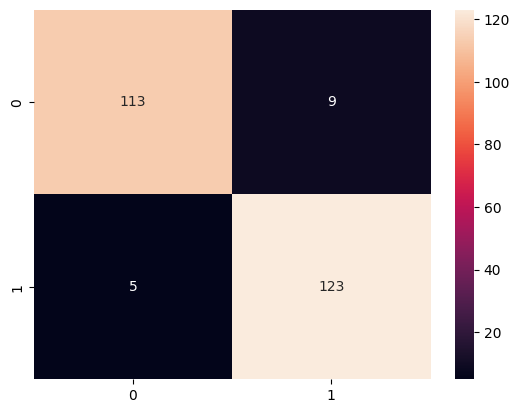

In [ ]:
cm_ideal_weighted = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)
sns.heatmap(cm_ideal_weighted, annot=True, fmt='g')

In [ ]:
report_ideal_weighted = classification_report(y_test, ideal_weighted_ensemble_prediction)

In [ ]:
print(report_ideal_weighted)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       122
           1       0.93      0.96      0.95       128

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



Text(0, 0.5, 'Fraction of incorrect predictions')

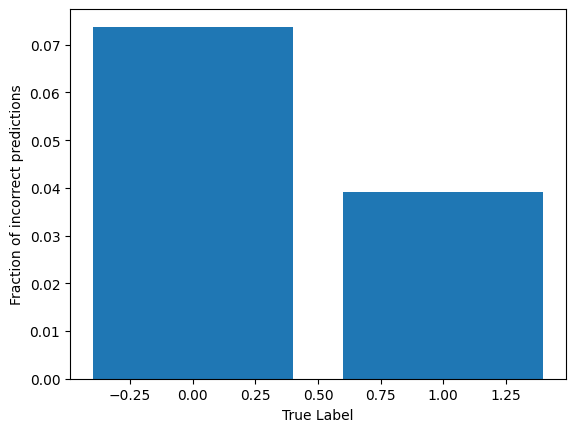

In [ ]:
incorr_fraction = 1 - np.diag(cm_ideal_weighted) / np.sum(cm_ideal_weighted, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
data = {
    'Model': ['VGG16', 'VGG19', 'Incption_V3', 'ResNet50','average ensemble','average weighted ensemble'],
    'Accuracy': [accuracy_VGG16, accuracy_VGG19, accuracy_v3, accuracy_Res,ensemble_accuracy,ideal_weighted_accuracy],
    'AUC': [auc_vgg16,auc_vgg19,auc_v3,auc_Res,ensemble_auc,ideal_weighted_auc],
    'Sensibility': [se_vgg16,se_vgg19,se_v3,se_Res,ensemble_se,ideal_weighted_se]
}

pretrained_table = pd.DataFrame(data)

In [ ]:
pretrained_table

Model  Accuracy       AUC  Sensibility
0                      VGG16     0.932  0.931288     0.960938
1                      VGG19     0.944  0.943584     0.960938
2                Incption_V3     0.924  0.922900     0.968750
3                   ResNet50     0.928  0.927574     0.945312
4           average ensemble     0.924  0.923476     0.945312
5  average weighted ensemble     0.944  0.943584     0.960938

#features extract preprocessing

In [ ]:
feature_extractor_VGG16 = model1.predict(x_train_vgg16)
feature_extractor_VGG19 = model2.predict(x_train_vgg19)
feature_extractor_inceptionV3 = model3.predict(x_train_v3)
feature_extractor_res50 = model4.predict(x_train_res)

24/24 [==============================] - 3s 124ms/step


In [ ]:
feature_extractor_VGG16.shape

(750, 2)

In [ ]:
flatten_feature_extractor_VGG16 = np.array(feature_extractor_VGG16)
flatten_feature_extractor_VGG19 = np.array(feature_extractor_VGG19)
flatten_feature_extractor_inceptionV3 = np.array(feature_extractor_inceptionV3)
flatten_feature_extractor_res50 = np.array(feature_extractor_res50)

In [ ]:
x_train_ensemble = np.concatenate([flatten_feature_extractor_VGG16,flatten_feature_extractor_VGG19,flatten_feature_extractor_inceptionV3,
                                   flatten_feature_extractor_res50],axis=-1)

In [ ]:
x_train_ensemble.shape

(750, 8)

In [ ]:
pred_VGG16 = model1.predict(x_test_vgg16)
pred_VGG19 = model2.predict(x_test_vgg19)
pred_inceptionV3 = model3.predict(x_test_v3)
pred_res50 = model4.predict(x_test_res)

8/8 [==============================] - 1s 87ms/step


In [ ]:
flatten_pred_VGG16 = np.array(pred_VGG16)
flatten_pred_VGG19 = np.array(pred_VGG19)
flatten_pred_inceptionV3 = np.array(pred_inceptionV3)
flatten_pred_res50 = np.array(pred_res50)

In [ ]:
ensemble_preds = np.concatenate((flatten_pred_VGG16,flatten_pred_VGG19,flatten_pred_inceptionV3,
                                 flatten_pred_res50),axis=-1)

#classifieur

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_1 = SVC()
model_2 = RandomForestClassifier(n_estimators=20, random_state=42)
model_3 = KNeighborsClassifier(n_neighbors=2)

In [ ]:
model_1.fit(x_train_ensemble,y_train)
model_2.fit(x_train_ensemble,y_train)
model_3.fit(x_train_ensemble,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred_SVM = model_1.predict(ensemble_preds) #SVM
y_pred_RF = model_2.predict(ensemble_preds) #RF
y_pred_KNN = model_3.predict(ensemble_preds) #KNN

In [ ]:
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)

In [ ]:
print('accuracy of SVM = ',accuracy_SVM)
print('accuracy of RF  = ',accuracy_RF)
print('accuracy of KNN = ',accuracy_KNN)

accuracy of SVM =  0.912
accuracy of RF  =  0.928
accuracy of KNN =  0.928


In [ ]:
auc_SVM = roc_auc_score(y_test, y_pred_SVM)
auc_RF = roc_auc_score(y_test, y_pred_RF)
auc_KNN = roc_auc_score(y_test, y_pred_KNN)

In [ ]:
print('auc of SVM = ',auc_SVM)
print('auc of RF  = ',auc_RF)
print('auc of KNN = ',auc_KNN)

auc of SVM =  0.9129098360655736
auc of RF  =  0.9271900614754098
auc of KNN =  0.9275742827868854


In [ ]:
se_SVM = recall_score(y_test,y_pred_SVM)
se_RF = recall_score(y_test,y_pred_RF)
se_KNN = recall_score(y_test,y_pred_KNN)

In [ ]:
print('se of SVM = ',se_SVM)
print('se of RF  = ',se_RF)
print('se of KNN = ',se_KNN)

se of SVM =  0.875
se of RF  =  0.9609375
se of KNN =  0.9453125


In [ ]:
cm_SVM = confusion_matrix(y_test,y_pred_SVM)
cm_RF = confusion_matrix(y_test,y_pred_RF)
cm_KNN = confusion_matrix(y_test,y_pred_KNN)

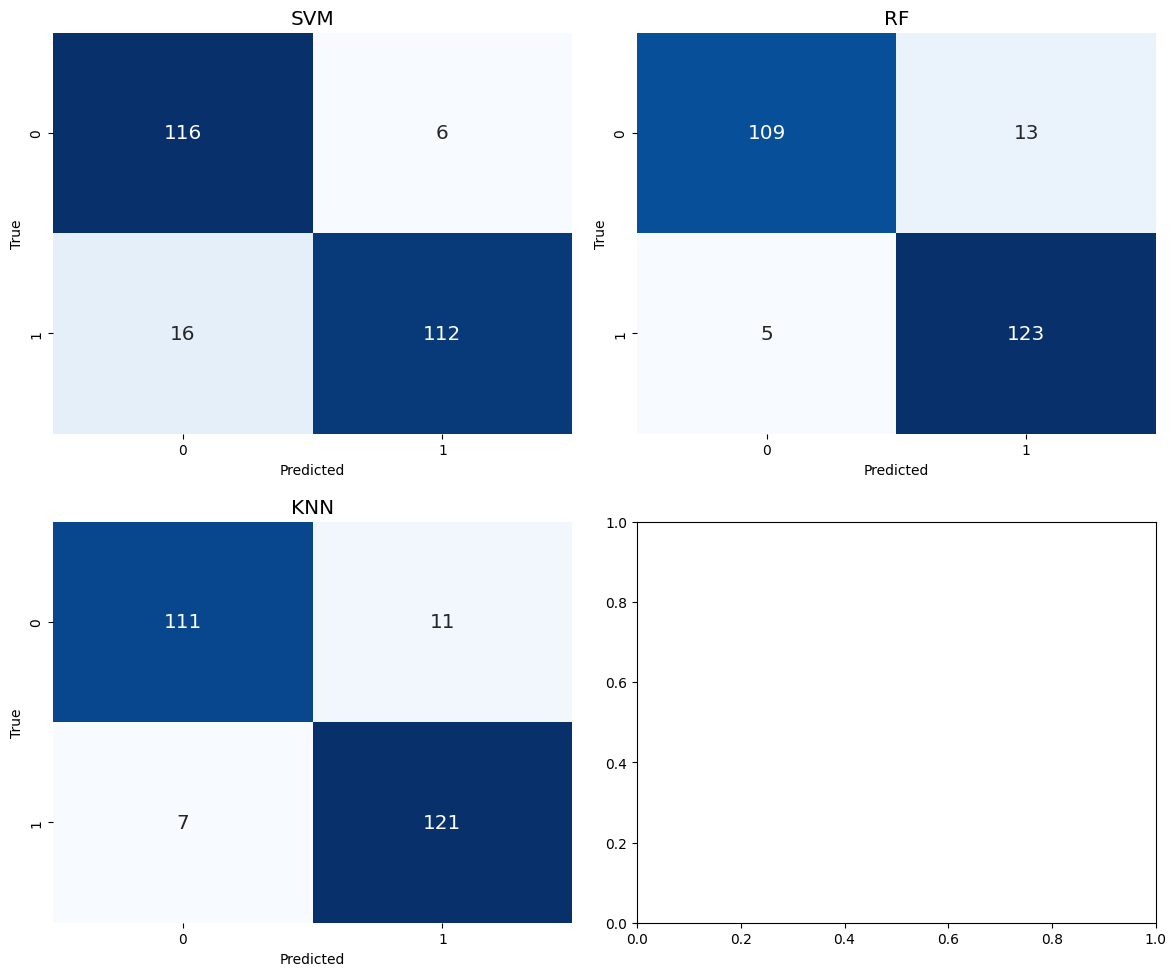

In [ ]:
# Create a list of four confusion matrices (replace these with your actual confusion matrices)
confusion_matrices_list = [cm_SVM, cm_RF, cm_KNN]
titles = ["SVM", "RF", "KNN"]

# Determine the number of rows and columns for the subplot grid
rows = 2
cols = 2

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each confusion matrix and plot it with a title
for i in range(len(confusion_matrices_list)):
    ax = axes[i]
    sns.set(font_scale=1.2)  # Adjust font size if needed
    sns.heatmap(confusion_matrices_list[i], annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(titles[i])

# Adjust spacing and display the figure
plt.tight_layout()
plt.show()

In [ ]:
#classification report
report_SVM = classification_report(y_test, y_pred_SVM)
report_RF = classification_report(y_test, y_pred_RF)
report_KNN = classification_report(y_test, y_pred_KNN)

In [ ]:
print(report_SVM)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       122
           1       0.95      0.88      0.91       128

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [ ]:
print(report_RF)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       122
           1       0.90      0.96      0.93       128

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [ ]:
print(report_KNN)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       122
           1       0.92      0.95      0.93       128

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [ ]:
data = {
    'Model': ['SVM', 'RF', 'KNN'],
    'Accuracy': [accuracy_SVM, accuracy_RF, accuracy_KNN],
    'AUC': [auc_SVM, auc_RF,auc_KNN],
    'sensibility': [se_SVM,se_RF,se_KNN]
}

data_table = pd.DataFrame(data)

In [ ]:
data_table.head()

Model  Accuracy       AUC  sensibility
0   SVM     0.912  0.912910     0.875000
1    RF     0.928  0.927190     0.960938
2   KNN     0.928  0.927574     0.945312

#voting classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model_voting = VotingClassifier([('SVM',model_1),('RF',model_2),('KNN',model_3)],voting='hard')

In [ ]:
model_voting.fit(x_train_ensemble,y_train)

VotingClassifier(estimators=[('SVM', SVC()),
                             ('RF',
                              RandomForestClassifier(n_estimators=20,
                                                     random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=2))])

In [ ]:
y_pred_Voting = model_voting.predict(ensemble_preds)

In [ ]:
accuracy_Voting = accuracy_score(y_test, y_pred_Voting)

In [ ]:
print('accuracy of voting classifier = ',accuracy_Voting)

accuracy of voting classifier =  0.928


In [ ]:
auc_Voting = roc_auc_score(y_test,y_pred_Voting)
se_Voting = recall_score(y_test,y_pred_Voting)

In [ ]:
print('auc_voting = ',auc_Voting)
print('se_voting = ',se_Voting)

auc_voting =  0.9275742827868854
se_voting =  0.9453125


<Axes: >

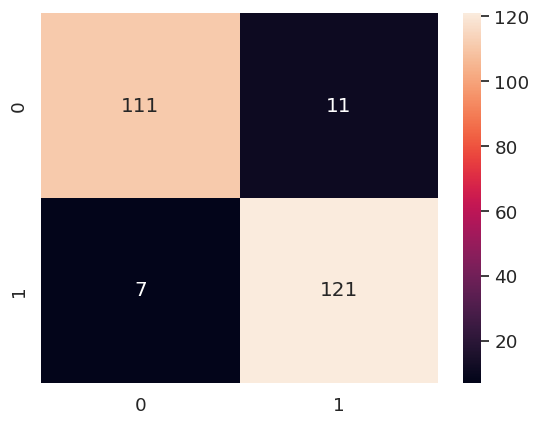

In [ ]:
cm_Voting = confusion_matrix(y_test,y_pred_Voting)
sns.heatmap(cm_Voting,annot=True,fmt='g')

In [ ]:
report_Voting = classification_report(y_test,y_pred_Voting)

In [ ]:
print(report_Voting)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       122
           1       0.92      0.95      0.93       128

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



#Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model_bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=30)

In [ ]:
model_bagging.fit(x_train_ensemble,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=30)

In [ ]:
y_pred_bagging = model_bagging.predict(ensemble_preds)

In [ ]:
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
auc_bagging = roc_auc_score(y_test,y_pred_bagging)
se_bagging = recall_score(y_test,y_pred_bagging)

In [ ]:
print('accuracy bagging = ', accuracy_bagging)
print('auc bagging = ', auc_bagging)
print('se bagging = ', se_bagging)

accuracy bagging =  0.928
auc bagging =  0.927766393442623
se bagging =  0.9375


<Axes: >

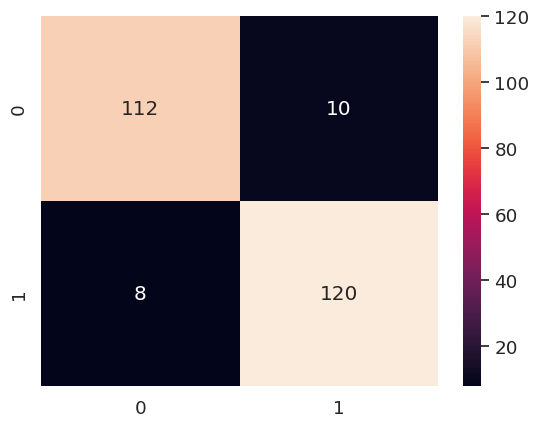

In [ ]:
cm_bagging = confusion_matrix(y_test,y_pred_bagging)
sns.heatmap(cm_bagging,annot=True,fmt='g')

In [ ]:
report_bagging = classification_report(y_test,y_pred_bagging)
print(report_bagging)

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       122
           1       0.92      0.94      0.93       128

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



#Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
model_Adaboost = AdaBoostClassifier(n_estimators=30)

In [ ]:
model_Adaboost.fit(x_train_ensemble,y_train)

AdaBoostClassifier(n_estimators=30)

In [ ]:
y_pred_Boosting = model_Adaboost.predict(ensemble_preds)

In [ ]:
accuracy_Boosting = accuracy_score(y_test, y_pred_Boosting)
auc_Boosting = roc_auc_score(y_test, y_pred_Boosting)
se_Boosting = recall_score(y_test, y_pred_Boosting)

In [ ]:
accuracy_Boosting

0.9666666666666667

In [ ]:
model_Gboost = GradientBoostingClassifier(n_estimators=30)

In [ ]:
model_Gboost.fit(x_train_ensemble,y_train)

GradientBoostingClassifier(n_estimators=30)

In [ ]:
y_pred_GBoosting = model_Gboost.predict(ensemble_preds)

In [ ]:
accuracy_GBoosting = accuracy_score(y_test, y_pred_GBoosting)
auc_GBoosting = roc_auc_score(y_test, y_pred_GBoosting)
se_GBoosting = recall_score(y_test, y_pred_GBoosting)

In [ ]:
print('accuracy_GBoosting = ', accuracy_GBoosting)
print('auc_GBoosting = ', auc_GBoosting)
print('se_GBoosting = ', se_GBoosting)

accuracy_GBoosting =  0.94
auc_GBoosting =  0.9392930327868853
se_GBoosting =  0.96875


<Axes: >

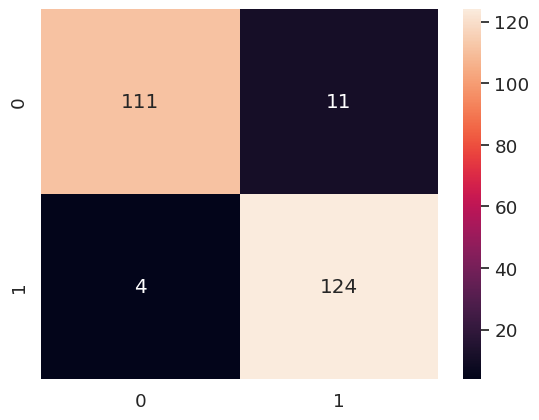

In [ ]:
cm_GBoosting = confusion_matrix(y_test,y_pred_GBoosting)
sns.heatmap(cm_GBoosting,annot=True,fmt='g')

In [ ]:
report_GBoosting = classification_report(y_test,y_pred_GBoosting)
print(report_GBoosting)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       122
           1       0.92      0.97      0.94       128

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



#stacking classifier

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
model_Stack = StackingClassifier([('SVM',model_1),('RF',model_2),('KNN',model_3)],final_estimator=RandomForestClassifier())

In [ ]:
model_Stack.fit(x_train_ensemble,y_train)

StackingClassifier(estimators=[('SVM', SVC()),
                               ('RF',
                                RandomForestClassifier(n_estimators=20,
                                                       random_state=42)),
                               ('KNN', KNeighborsClassifier(n_neighbors=2))],
                   final_estimator=RandomForestClassifier())

In [ ]:
y_pred_Stack = model_Stack.predict(ensemble_preds)

In [ ]:
accuracy_Stack = accuracy_score(y_test,y_pred_Stack)
auc_Stack = roc_auc_score(y_test,y_pred_Stack)
se_Stack = recall_score(y_test,y_pred_Stack)

In [ ]:
print('accuracy_Stack = ', accuracy_Stack)
print('auc_Stack = ', auc_Stack)
print('se_Stack = ', se_Stack)

accuracy_Stack =  0.932
auc_Stack =  0.9312884221311476
se_Stack =  0.9609375


<Axes: >

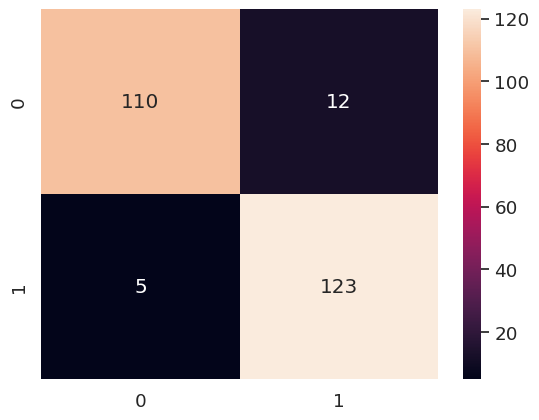

In [ ]:
cm_Stack = confusion_matrix(y_test,y_pred_Stack)
sns.heatmap(cm_Stack,annot=True,fmt='g')

In [ ]:
report_Stack = classification_report(y_test,y_pred_Stack)
print(report_Stack)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       122
           1       0.91      0.96      0.94       128

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



In [ ]:
data = {
    'Model': ['VGG16', 'VGG19', 'Incption_V3', 'ResNet50','average ensemble','average weighted ensemble','voting','bagging','boosting','stack'],
    'Accuracy': [accuracy_VGG16, accuracy_VGG19, accuracy_v3, accuracy_Res,ensemble_accuracy,ideal_weighted_accuracy,accuracy_Voting,accuracy_bagging,accuracy_GBoosting,accuracy_Stack],
    'AUC': [auc_vgg16,auc_vgg19,auc_v3,auc_Res,ensemble_auc,ideal_weighted_auc,auc_Voting,auc_bagging,auc_GBoosting,auc_Stack],
    'Sensibility': [se_vgg16,se_vgg19,se_v3,se_Res,ensemble_se,ideal_weighted_se,se_Voting,se_bagging,se_GBoosting,se_Stack]
}

pretrained_table = pd.DataFrame(data)

In [ ]:
pretrained_table.head(10)

Model  Accuracy       AUC  Sensibility
0                      VGG16     0.932  0.931288     0.960938
1                      VGG19     0.944  0.943584     0.960938
2                Incption_V3     0.924  0.922900     0.968750
3                   ResNet50     0.928  0.927574     0.945312
4           average ensemble     0.924  0.923476     0.945312
5  average weighted ensemble     0.944  0.943584     0.960938
6                     voting     0.928  0.927574     0.945312
7                    bagging     0.928  0.927766     0.937500
8                   boosting     0.940  0.939293     0.968750
9                      stack     0.932  0.931288     0.960938